In [233]:
import pip
pip.main(['install','seaborn'])
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable

Requirement already satisfied: seaborn in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (0.13.2)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from seaborn) (1.26.4)

Requirement already satisfied: pandas>=1.2 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from seaborn) (2.2.0)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from seaborn) (3.8.3)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.0)

Requirement already satisfied: cycler>=0.10 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.49.0)

Requirement already satisfied: kiwisolver>=1.3.1 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.5)

Requirement already satisfied: packaging>=20.0 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (23.2)

Requirement already satisfied: pillow>=8 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.2.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.1.1)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: tzdata>=2022.7 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: six>=1.5 in c:\users\aiden\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.16.0)

In [265]:
training_data = pd.read_csv('C:/datasets/cs-training.csv').drop('Unnamed: 0', axis = 1)
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [266]:
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [267]:
#replace outliers by winsorization
!pip install scipy
import scipy as sp
from scipy.stats.mstats import winsorize
training_data_winsorized=training_data.copy()

Defaulting to user installation because normal site-packages is not writeable


In [268]:
training_data_winsorized['monthlyincome']= winsorize(training_data_winsorized['monthlyincome'],\
                                                     limits=[0.2,0.2],inplace=True) #replace outliers by either 10th or 90th percentile

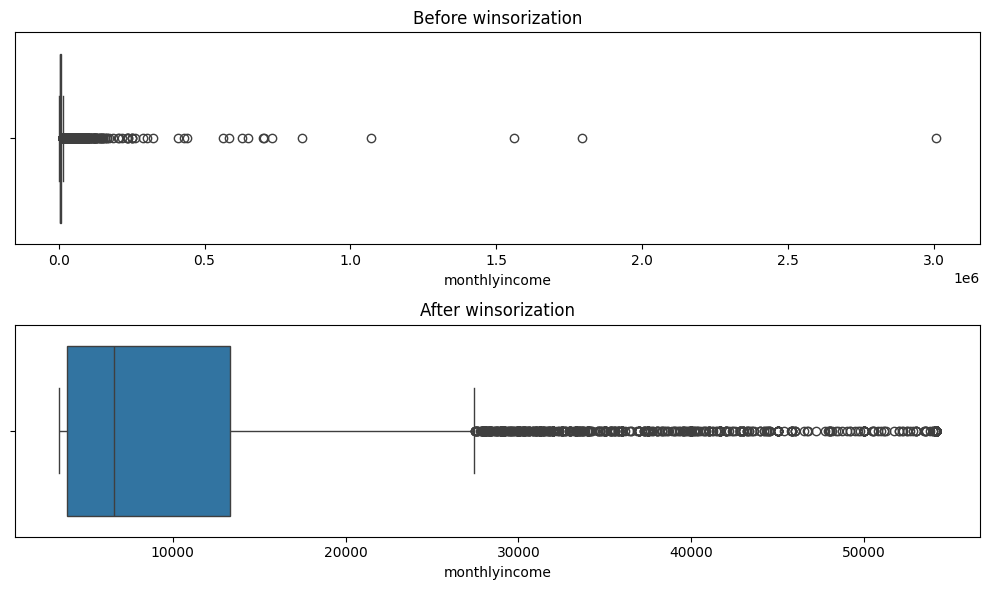

In [269]:
fig,axes=plt.subplots(2,1,figsize=(10,6))
sns.boxplot(data=training_data,x='monthlyincome',ax=axes[0])
sns.boxplot(data=training_data_winsorized,x='monthlyincome',ax=axes[1])
axes[0].set_title('Before winsorization')
axes[1].set_title('After winsorization')
plt.tight_layout()

In [270]:
training_data.describe()['numberofdependents']

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: numberofdependents, dtype: float64

In [289]:
import collections

collections.Counter(training_data.numberofdependents.fillna(training_data.numberofdependents.median()))

Counter({0.0: 90826,
         1.0: 26316,
         2.0: 19522,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         7.0: 51,
         8.0: 24,
         10.0: 5,
         9.0: 5,
         20.0: 1,
         13.0: 1})

In [272]:
#remove outliers by z score method
from scipy import stats
z=np.abs(stats.zscore(training_data['numberofdependents'],nan_policy='omit'))
print(z)

0         1.114517
1         0.217722
2         0.679073
3         0.679073
4         0.679073
            ...   
149995    0.679073
149996    1.114517
149997    0.679073
149998    0.679073
149999    0.679073
Name: numberofdependents, Length: 150000, dtype: float64


In [273]:
thresholdofz=3 #data with z score>3 are removed
outliers=np.where(z>thresholdofz)[0]
removeoutliers=training_data.drop(outliers)

In [293]:
collections.Counter(removeoutliers.numberofdependents.fillna(removeoutliers.numberofdependents.median()))
#All the outliers get removed

Counter({0.0: 90826, 1.0: 26316, 2.0: 19522, 3.0: 9483, 4.0: 2862})

Text(0.5, 1.0, 'After removing outliers')

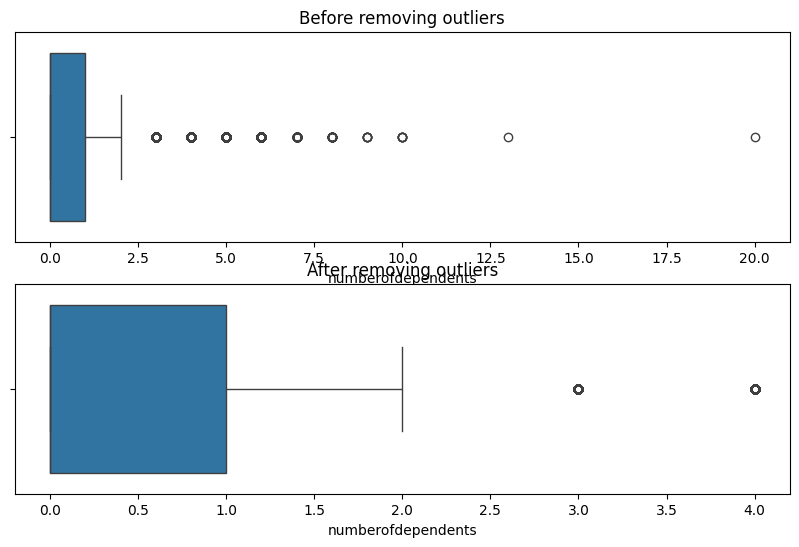

In [275]:
fig,axes=plt.subplots(2,1,figsize=(10,6))
sns.boxplot(data=training_data,x='numberofdependents',ax=axes[0])
sns.boxplot(data=removeoutliers,x='numberofdependents',ax=axes[1])
axes[0].set_title('Before removing outliers')
axes[1].set_title('After removing outliers')

([<matplotlib.axis.XTick at 0x1bfd7102cf0>,
 [Text(0, 0, '0'), Text(5, 0, '5'), Text(10, 0, '10'), Text(15, 0, '15')])

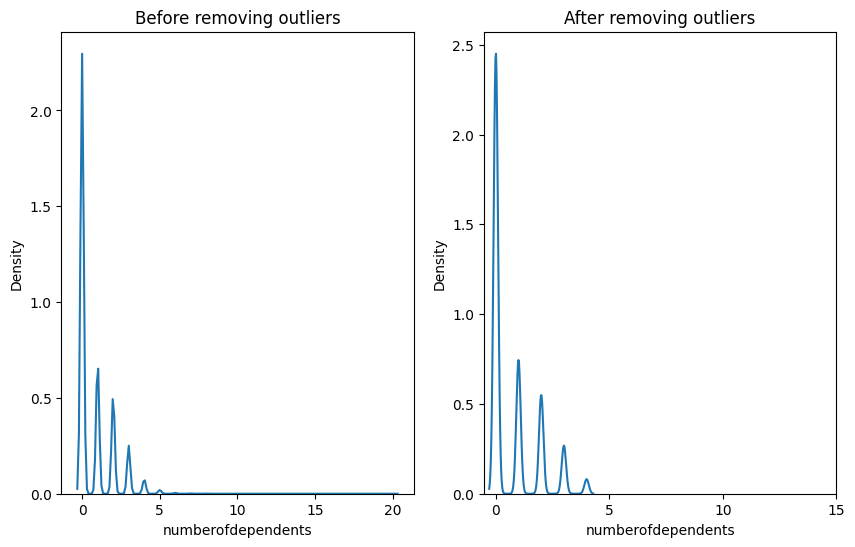

In [276]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
sns.kdeplot(data=training_data, x="numberofdependents",ax=axes[0])
sns.kdeplot(data=removeoutliers, x="numberofdependents",ax=axes[1])
axes[0].set_title('Before removing outliers')
axes[1].set_title('After removing outliers')
plt.xticks(np.arange(0, 20, 5)) 
#distribution is the same after removing the outliers

In [277]:
training_data.describe()['numberofopencreditlinesandloans']

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: numberofopencreditlinesandloans, dtype: float64

In [278]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))
   return df
K=impute_outliers_IQR(training_data.numberofopencreditlinesandloans)
print(K)
K.std()

[13.  4.  2. ... 18.  4.  8.]


4.327544240762389

<Axes: >

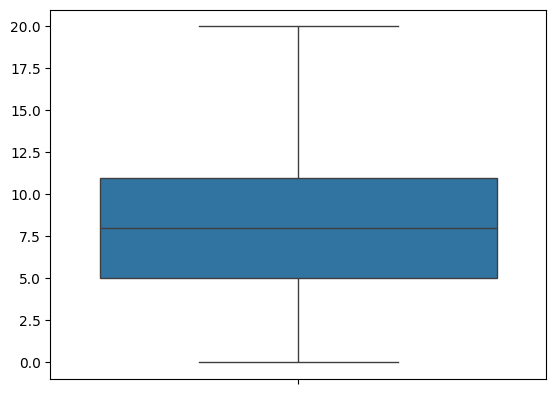

In [279]:
sns.boxplot(K)

In [280]:
collections.Counter(training_data.numberoftimes90dayslate)

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         98: 264,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         96: 5,
         11: 5,
         13: 4,
         15: 2,
         14: 2,
         12: 2,
         17: 1})

In [281]:
#z score method
z1=np.abs(stats.zscore(training_data['numberoftimes90dayslate'],nan_policy='omit'))
thresholdofz1=4
print(z1)

0         0.063793
1         0.063793
2         0.176056
3         0.063793
4         0.063793
            ...   
149995    0.063793
149996    0.063793
149997    0.063793
149998    0.063793
149999    0.063793
Name: numberoftimes90dayslate, Length: 150000, dtype: float64


In [282]:
outliers2=np.where(z1>thresholdofz1)[0]
removeoutliers2=training_data.drop(outliers2)

In [283]:
collections.Counter(removeoutliers2.numberoftimes90dayslate)
#All the outliers get removed

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         11: 5,
         13: 4,
         15: 2,
         14: 2,
         12: 2})

([<matplotlib.axis.XTick at 0x1bfd719f7a0>,
 [Text(0, 0, '0'), Text(5, 0, '5'), Text(10, 0, '10'), Text(15, 0, '15')])

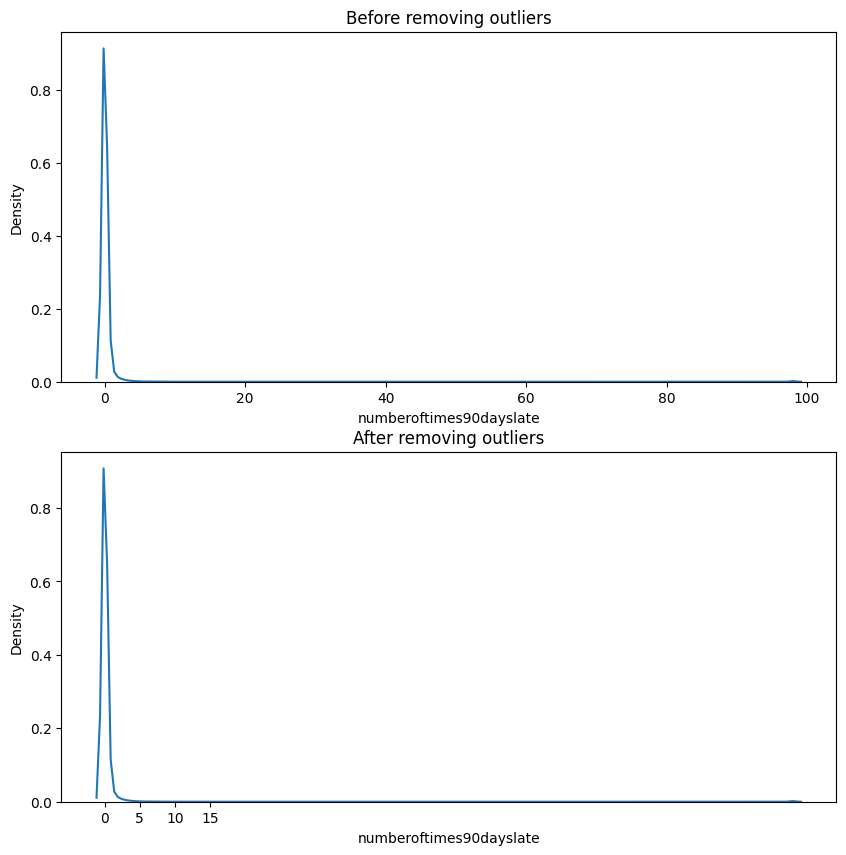

In [284]:
fig,axes=plt.subplots(2,1,figsize=(10,10))
sns.kdeplot(data=training_data, x="numberoftimes90dayslate",ax=axes[0])
sns.kdeplot(data=removeoutliers, x="numberoftimes90dayslate",ax=axes[1])
axes[0].set_title('Before removing outliers')
axes[1].set_title('After removing outliers')
plt.xticks(np.arange(0, 20, 5))

In [285]:
collections.Counter(training_data.numberoftime3059dayspastduenotworse)

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         98: 264,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         96: 5,
         10: 4,
         12: 2,
         13: 1,
         11: 1})

In [286]:
New = []
ninetypercentile = np.percentile(training_data.numberoftime3059dayspastduenotworse,99)
for val in training_data.numberoftime3059dayspastduenotworse:
    # Replace outliers 96 and 98 as the 99th percentile 
    if ((val == 98) | (val == 96)):
        New.append(ninetypercentile)
    else:
        New.append(val)

training_data.numberoftime3059dayspastduenotworse = New

In [264]:
collections.Counter(New)
#All of the outliers are changed

Counter({0.0: 126018,
         1.0: 16302,
         2.0: 4598,
         3.0: 1754,
         4.0: 747,
         5.0: 342,
         6.0: 140,
         7.0: 54,
         8.0: 25,
         9.0: 12,
         10.0: 4,
         12.0: 2,
         13.0: 1,
         11.0: 1})

In [257]:
revNew = []
training_data.revolvingutilizationofunsecuredlines
for val in training_data.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
training_data.revolvingutilizationofunsecuredlines = revNew

In [258]:
ageNew = []
for val in training_data.age:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
training_data.age = ageNew

In [135]:
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))  # Convert zip object to list
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [136]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
#std_div(data=training_data.age)

In [137]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))

In [138]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold

In [139]:
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict
outlierRatio(training_data.debtratio)

{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

In [140]:
X_1 = mad_based_outlier(training_data.debtratio).sum()/len(training_data.debtratio)
X_2 = 1- X_1

proportion_debtration = [X_1, X_2]

In [141]:
proportion_debtration

[0.21151333333333333, 0.7884866666666667]

In [142]:
def add_freq(ax, proportions):
    ax2 = ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    for i, proportion in enumerate(proportions):
        ax.bar(i, proportion * 100)
        ax.text(i, proportion * 100 + 2, f'{proportion:.2f}', ha='center')

    ax.set_xticks(range(len(proportions)))
    ax.set_xticklabels(['True', 'False']) 

    ax2.set_ylim(0, 100)
    ax2.grid(None)

proportions = proportion_debtration

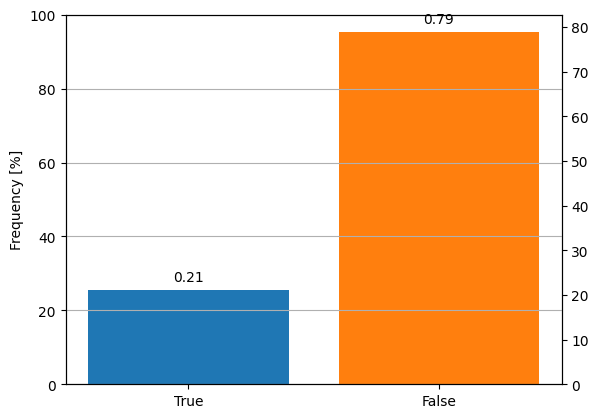

In [143]:
fig, ax = plt.subplots()
add_freq(ax, proportions)
plt.show()


In [144]:
minUpperBound = min([val for (val, out) in zip(training_data.debtratio, mad_based_outlier(training_data.debtratio)) if out == True])

In [145]:
newDebtRatio = []
for val in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

training_data.debtratio = newDebtRatio 

In [146]:
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    funcs = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    titles = ['Percentile-based', 'MAD-based', 'STD-based', 'Majority vote based']
    
    for ax, func, title in zip(axes, funcs, titles):
        mask_outliers = np.array(func(x))  # Ensure that mask_outliers is a NumPy array
        n_outliers = np.sum(mask_outliers)
        nOutliers.append(n_outliers)
        outlier_free = x[~mask_outliers]  # Use the mask to filter non-outliers
        sns.distplot(outlier_free, ax=ax, rug=True, hist=False)
        ax.set_title(f'{title} Outliers, removed: {n_outliers}', y=0.95, x=0.05, ha='left', va='top', size=15)
        
    fig.suptitle(f'Outlier Removed By Method with n={len(x)}', size=20)
    fig.set_size_inches(15, 10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

C:\Users\aiden\AppData\Local\Temp\ipykernel_21984\3148753310.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outlier_free, ax=ax, rug=True, hist=False)
C:\Users\aiden\AppData\Local\Temp\ipykernel_21984\3148753310.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outlier

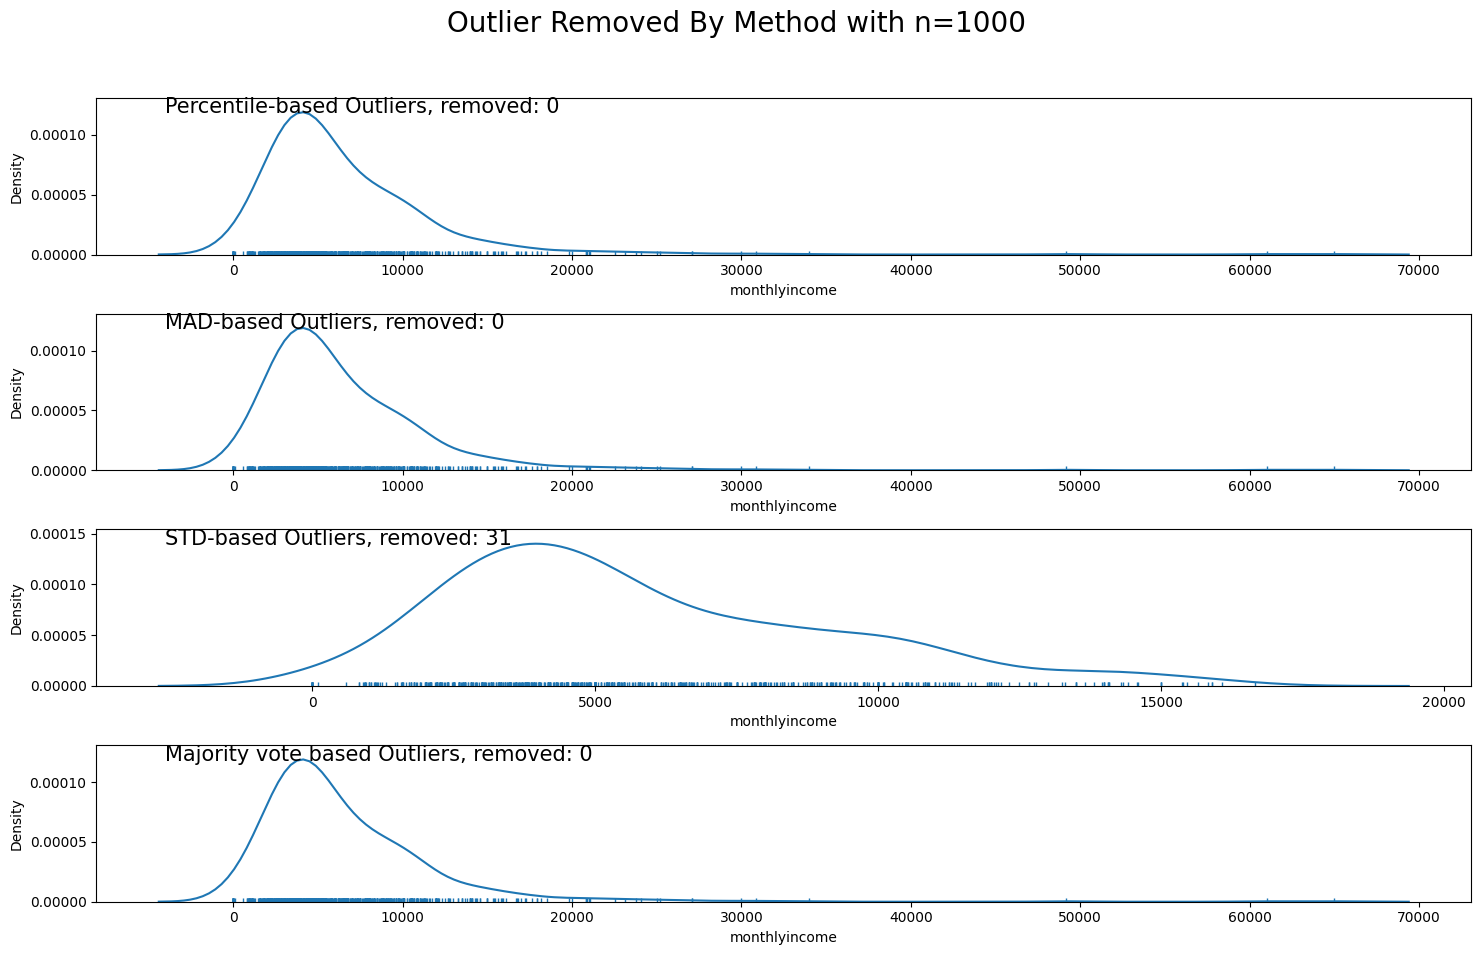

In [147]:
plotOutlierFree(training_data.monthlyincome.sample(1000))

In [148]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [149]:
incomeNew = replaceOutlier(training_data.monthlyincome, replace='median')

C:\Users\aiden\AppData\Local\Temp\ipykernel_21984\3435170146.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x.iloc[i][1] == True:
C:\Users\aiden\AppData\Local\Temp\ipykernel_21984\3435170146.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debtNew.append(x.iloc[i][0])


In [150]:
training_data.monthlyincome = incomeNew

In [151]:
collections.Counter(training_data.numberoftimes90dayslate)

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         98: 264,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         96: 5,
         11: 5,
         13: 4,
         15: 2,
         14: 2,
         12: 2,
         17: 1})

In [152]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [153]:
new = removeSpecificAndPutMedian(training_data.numberoftimes90dayslate)

In [154]:
training_data.numberoftimes90dayslate = new

In [155]:
collections.Counter(training_data.numberrealestateloansorlines)

Counter({0: 56188,
         1: 52338,
         2: 31522,
         3: 6300,
         4: 2170,
         5: 689,
         6: 320,
         7: 171,
         8: 93,
         9: 78,
         10: 37,
         11: 23,
         12: 18,
         13: 15,
         15: 7,
         14: 7,
         17: 4,
         16: 4,
         25: 3,
         18: 2,
         23: 2,
         19: 2,
         20: 2,
         26: 1,
         54: 1,
         21: 1,
         29: 1,
         32: 1})

In [156]:
realNew = []
for val in training_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew

In [157]:
collections.Counter(training_data.numberoftime6089dayspastduenotworse)

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         98: 264,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         96: 5,
         8: 2,
         11: 1,
         9: 1})

In [158]:
new = removeSpecificAndPutMedian(training_data.numberoftime6089dayspastduenotworse)
training_data.numberoftime6089dayspastduenotworse = new

In [160]:
depNew = []
for var in training_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

In [70]:
training_data.numberofdependents = depNew